<a href="https://colab.research.google.com/github/marwenmejri/ASL_Recognition_Kivy_App/blob/main/NER%2BTransformers_model_Manually_Annotated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Install & Import Dependencies**

In [2]:
!python -m pip uninstall -y spacy
!python -m pip install -U spacy

Found existing installation: spacy 2.2.4
Uninstalling spacy-2.2.4:
  Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 6.0 MB 5.5 MB/s 
     |████████████████████████████████| 10.1 MB 31.2 MB/s 
     |████████████████████████████████| 653 kB 42.7 MB/s 
     |████████████████████████████████| 181 kB 46.2 MB/s 
     |████████████████████████████████| 451 kB 48.7 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0


In [3]:
!pip install spacy-transformers

     |████████████████████████████████| 51 kB 127 kB/s 
     |████████████████████████████████| 1.1 MB 10.5 MB/s 
     |████████████████████████████████| 3.8 MB 34.2 MB/s 
     |████████████████████████████████| 6.5 MB 26.7 MB/s 
     |████████████████████████████████| 596 kB 33.7 MB/s 
     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 895 kB 26.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import spacy
import json
import random
import spacy_transformers

## **Training**

In [ ]:
## Creating config file for cli training
!python -m spacy init fill-config /content/base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy debug config config.cfg


============================= Config validation =============================

===================== Config validation for [initialize] =====================

====================== Config validation for [training] ======================
✔ Config is valid


In [ ]:
!python -m spacy debug data config.cfg 


============================ Data file validation ============================
Downloading: 100% 481/481 [00:00<00:00, 583kB/s]
Downloading: 100% 878k/878k [00:00<00:00, 5.10MB/s]
Downloading: 100% 446k/446k [00:00<00:00, 4.24MB/s]
Downloading: 100% 1.29M/1.29M [00:00<00:00, 7.06MB/s]
Downloading: 100% 478M/478M [00:11<00:00, 42.0MB/s]
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fro

In [ ]:
!python -m spacy train config.cfg --output /content/outputs --gpu-id 0

✔ Created output directory: /content/outputs
ℹ Saving to output directory: /content/outputs
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
[2022-03-24 21:33:43,266] [INFO] Set up nlp object from config
[2022-03-24 21:33:43,279] [INFO] Pipeline: ['transformer', 'ner']
[2022-03-24 21:33:43,286] [INFO] Created vocabulary
[2022-03-24 21:33:43,288] [INFO] Finished initializing nlp object
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model t

## **Evaluating the trained Model**

In [ ]:
!python -m spacy evaluate /content/outputs/model-best /content/test_data.spacy --gpu-id 0

ℹ Using GPU: 0

================================== Results ==================================

TOK     100.00
NER P   93.98 
NER R   91.46 
NER F   92.70 
SPEED   2899  


=============================== NER (per type) ===============================

             P        R        F
NAME     95.86    96.53    96.19
BRAND    93.11    89.53    91.29
GTIN    100.00   100.00   100.00



In [ ]:
!python -m spacy evaluate /content/outputs/model-last /content/test_data.spacy --gpu-id 0

ℹ Using GPU: 0

================================== Results ==================================

TOK     100.00
NER P   96.52 
NER R   87.82 
NER F   91.96 
SPEED   2876  


=============================== NER (per type) ===============================

             P        R        F
NAME     97.96   100.00    98.97
BRAND    95.83    83.55    89.27
GTIN    100.00   100.00   100.00



## **Saving the Model**

In [ ]:
!cp -r /content/outputs /content/drive/MyDrive/Marwen_Mejri_PFE/Trained_NER_Model/NER+Transformers_model_pharma

In [ ]:
!zip -r folder.zip /content/outputs 

## **Loading the Model**

In [7]:
# Load the Traind Model
nlp = spacy.load("/content/drive/MyDrive/Marwen_Mejri_PFE/Trained_NER_Model/NER+Transformers_model_pharma/model-best")

## **Formal Test**

In [8]:
import spacy
import json

def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

### **Converting our test data to a proper formal test format**

In [9]:
import srsly
from spacy.training import docs_to_json, offsets_to_biluo_tags, biluo_tags_to_spans

TEST_DATA = load_data('/content/test_data.json')
docs = TEST_DATA 

### **Utilities functions**

In [10]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        print (doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities
  
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)

def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

### **Confusion Matrix**

In [15]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    print (y_true)
    print (y_pred)
    return confusion_matrix(y_true=y_true, y_pred=y_pred, labels=classes)

In [16]:
generate_confusion_matrix(docs)

["   http : //schema.org/Product .  photo_produit data- 485 data-  data- 731  produit_54454 . img  Luxéol Spécial Volume 30 Capsules  normal photo_paysage  265    image    2x  Luxéol Spécial Volume 30 Capsules  400 .  titre_produit  prio_12_1  name . Luxéol .Spécial Volume 30 Capsules 1 . de  b  /marques/luxeol.html  Voir tous les produits de la marque Luxéol .  brand    http : //schema.org/Brand .  name . Luxéol . .  54454  sku .  offers    http : //schema.org/Offer . link  https :  url . Boîte de 30 capsules .  prix  prix_54454 .  color_eb701d  produit_54454 .  16.30  price . 16,30 .  EUR  priceCurrency . € . Prix au Kg/L : 926,14 € .  produit_indisponible invisible   . Article bientôt disponible  stock_infobulle . img   16  //cdn1.costatic.comssets/imgelp-16.png  16 . L'article est actuellement en cours de réapprovisionnement dans notre entrepôt , n'hésitez pas à vous inscrire à notre alerte disponibilité pour être averti de sa disponibilité. . .  invisible indispo  indispo_54454 . 

array([[  578,     0,     2,    60],
       [    0,    20,     0,     0],
       [    1,     0,  1346,    14],
       [   36,     0,    14, 29584]])

In [17]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

["   http : //schema.org/Product .  photo_produit data- 485 data-  data- 731  produit_54454 . img  Luxéol Spécial Volume 30 Capsules  normal photo_paysage  265    image    2x  Luxéol Spécial Volume 30 Capsules  400 .  titre_produit  prio_12_1  name . Luxéol .Spécial Volume 30 Capsules 1 . de  b  /marques/luxeol.html  Voir tous les produits de la marque Luxéol .  brand    http : //schema.org/Brand .  name . Luxéol . .  54454  sku .  offers    http : //schema.org/Offer . link  https :  url . Boîte de 30 capsules .  prix  prix_54454 .  color_eb701d  produit_54454 .  16.30  price . 16,30 .  EUR  priceCurrency . € . Prix au Kg/L : 926,14 € .  produit_indisponible invisible   . Article bientôt disponible  stock_infobulle . img   16  //cdn1.costatic.comssets/imgelp-16.png  16 . L'article est actuellement en cours de réapprovisionnement dans notre entrepôt , n'hésitez pas à vous inscrire à notre alerte disponibilité pour être averti de sa disponibilité. . .  invisible indispo  indispo_54454 . 

(array([[  578,     0,     2,    60],
        [    0,    20,     0,     0],
        [    1,     0,  1346,    14],
        [   36,     0,    14, 29584]]),
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>)

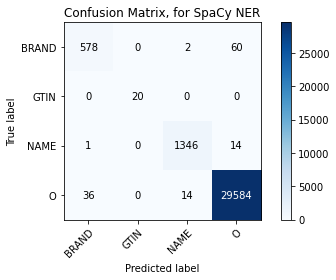

In [18]:
plot_confusion_matrix(docs, classes=get_dataset_labels(), normalize=False)